In [1]:
# os, to see if a file exists
import os
# tabular data manipulation
import numpy as np
import pandas as pd
# data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing module for scaling
import sklearn.preprocessing as pre
# train test split
from sklearn.model_selection import train_test_split
# access to sql query
import wrangle as w

In [2]:
# wrangled zillow data loaded into a pandas DataFrame 
df = w.wrangle_zillow()

In [3]:
# split the data via function in wrangle.py
train, validate, test = w.split_data_other(df)

In [4]:
df.shape

(1884004, 8)

In [5]:
df.head()

,beds,baths,sq_ft,tax,year,fips,county,2017_age
6,3,4,1620,847770.0,2011,6037.0,0,6
7,3,2,2077,646760.0,1926,6037.0,0,91
18,3,1,1244,169471.0,1950,6037.0,0,67
19,3,2,1300,233266.0,1950,6037.0,0,67
20,3,2,1222,290492.0,1951,6037.0,0,66


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884004 entries, 6 to 2152862
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   beds      int64  
 1   baths     int64  
 2   sq_ft     int64  
 3   tax       float64
 4   year      int64  
 5   fips      float64
 6   county    int64  
 7   2017_age  int64  
dtypes: float64(2), int64(6)
memory usage: 129.4 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,1884004.0,3.218737,0.782936,2.0,3.0,3.0,4.0,5.0
baths,1884004.0,2.014975,0.704828,1.0,2.0,2.0,2.0,4.0
sq_ft,1884004.0,1663.441380,571.300009,1.0,1234.0,1555.0,2004.0,3410.0
tax,1884004.0,335074.906168,207107.560270,1.0,175399.0,300000.0,460775.0,950965.0
year,1884004.0,1959.610724,20.755499,1801.0,1949.0,1957.0,1972.0,2016.0
fips,1884004.0,6048.287411,20.467397,6037.0,6037.0,6037.0,6059.0,6111.0
county,1884004.0,0.407461,0.629540,0.0,0.0,0.0,1.0,2.0
2017_age,1884004.0,57.389276,20.755499,1.0,45.0,60.0,68.0,216.0


Apply the scalers we talked about in this lesson to your data

In [8]:
# assign features into variables
normal_cols = ['beds','baths','year']
log_cols = ['sq_ft','tax']

In [9]:
# copy train into a variable
train_scaled = train.copy()

In [10]:
# apply curriculum scalers

minmax_scaler = pre.MinMaxScaler()
train_scaled[['beds_minmax',
              'baths_minmax', 
              'year_minmax']] = minmax_scaler.fit_transform(train[normal_cols])

standard_scaler = pre.StandardScaler()
train_scaled[['beds_standard',
              'baths_standard', 
              'year_standard']] = standard_scaler.fit_transform(train[normal_cols])

robust_scaler = pre.RobustScaler()
train_scaled[['beds_robust',
              'baths_robust', 
              'year_robust']] = robust_scaler.fit_transform(train[normal_cols])


Visualize the results for the unscaled and scaled distribution

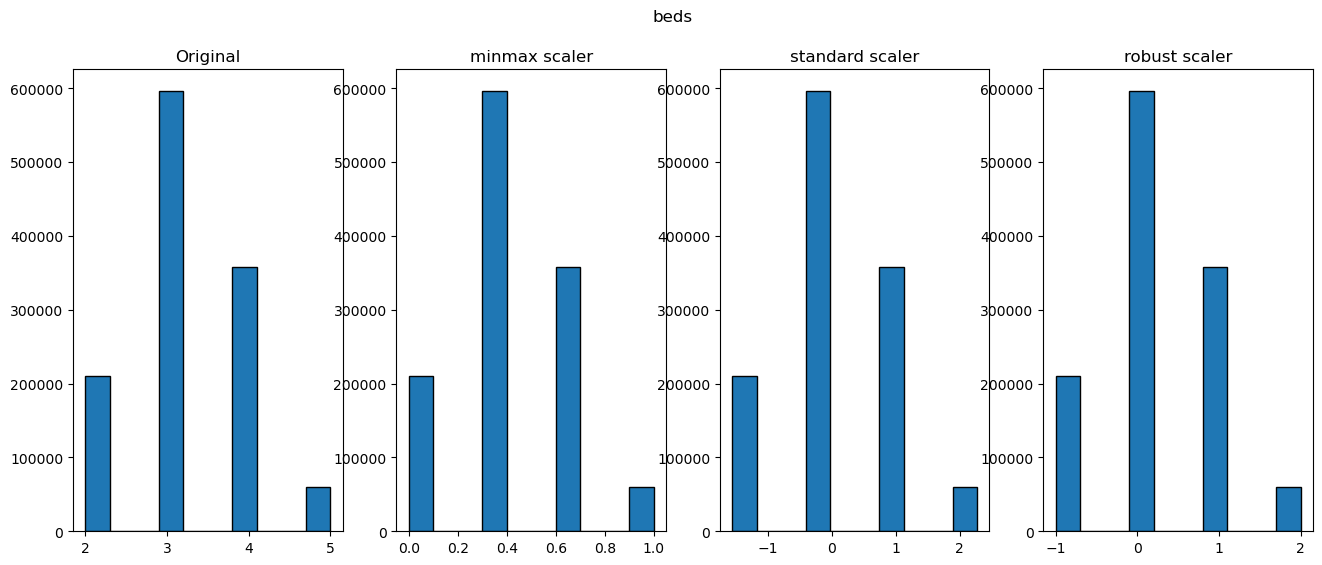

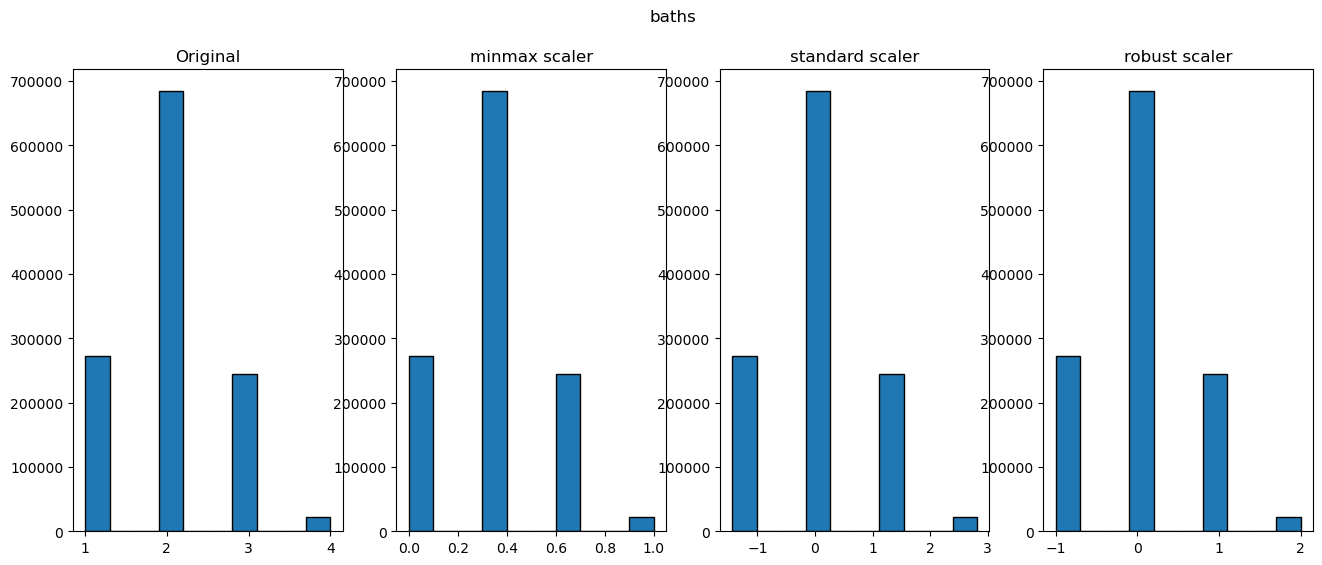

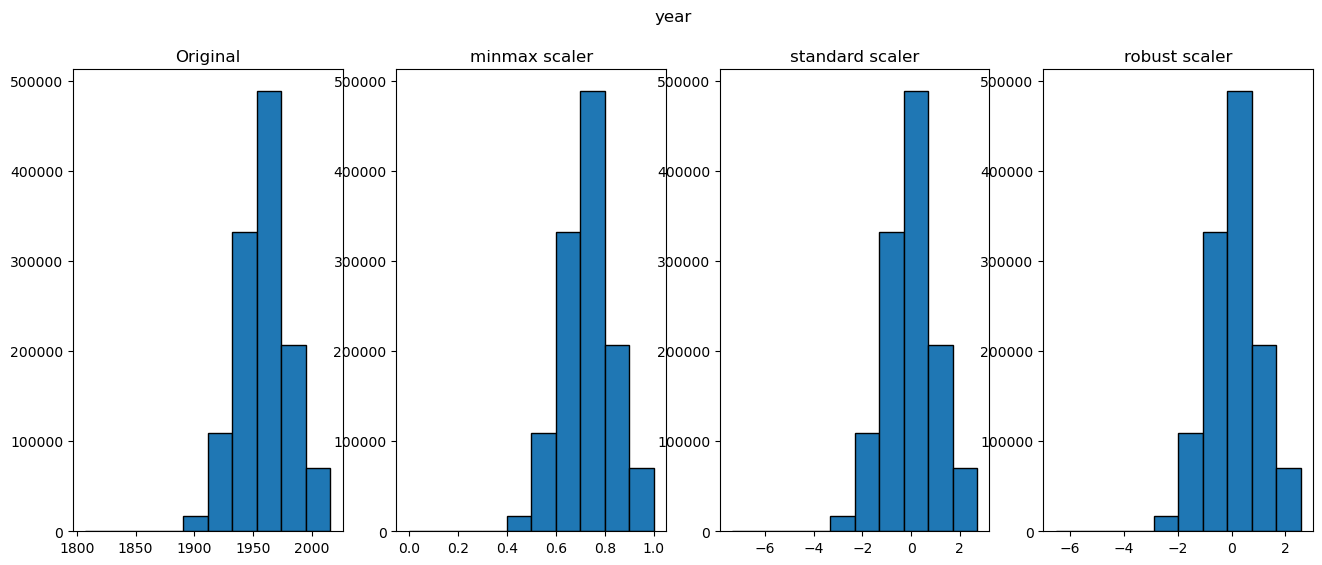

In [11]:
# for loop designed to plot the original data and scaler
for col in normal_cols:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled[col], ec='black')
    ax1.set_title('Original')

    ax2.hist(train_scaled[f'{col}_minmax'], ec='black')
    ax2.set_title('minmax scaler')

    ax3.hist(train_scaled[f'{col}_standard'], ec='black')
    ax3.set_title('standard scaler')

    ax4.hist(train_scaled[f'{col}_robust'], ec='black')
    ax4.set_title('robust scaler')

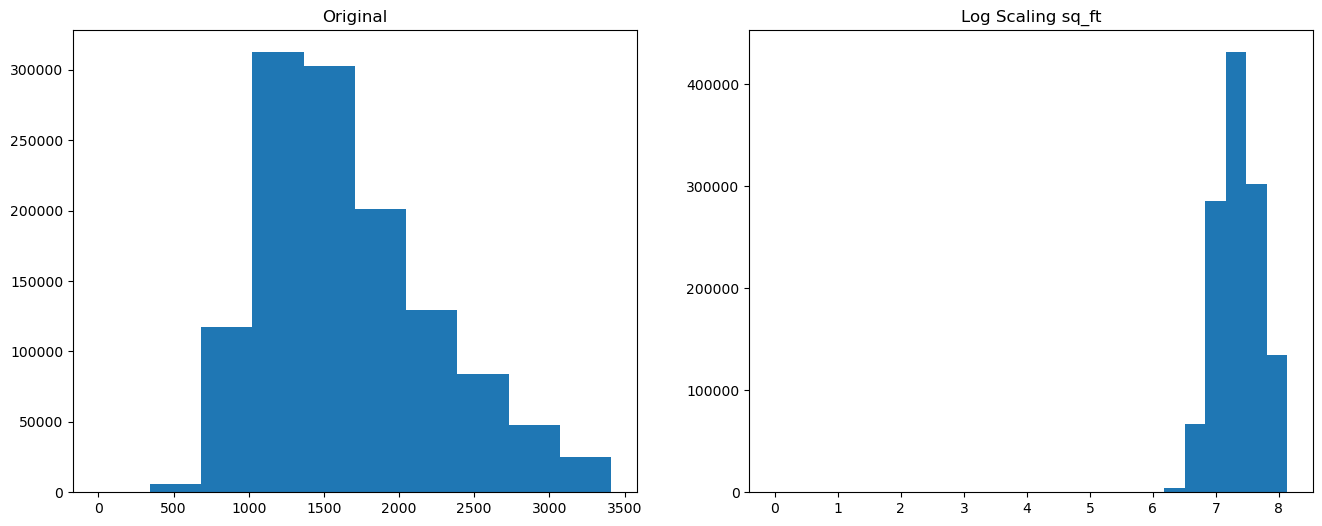

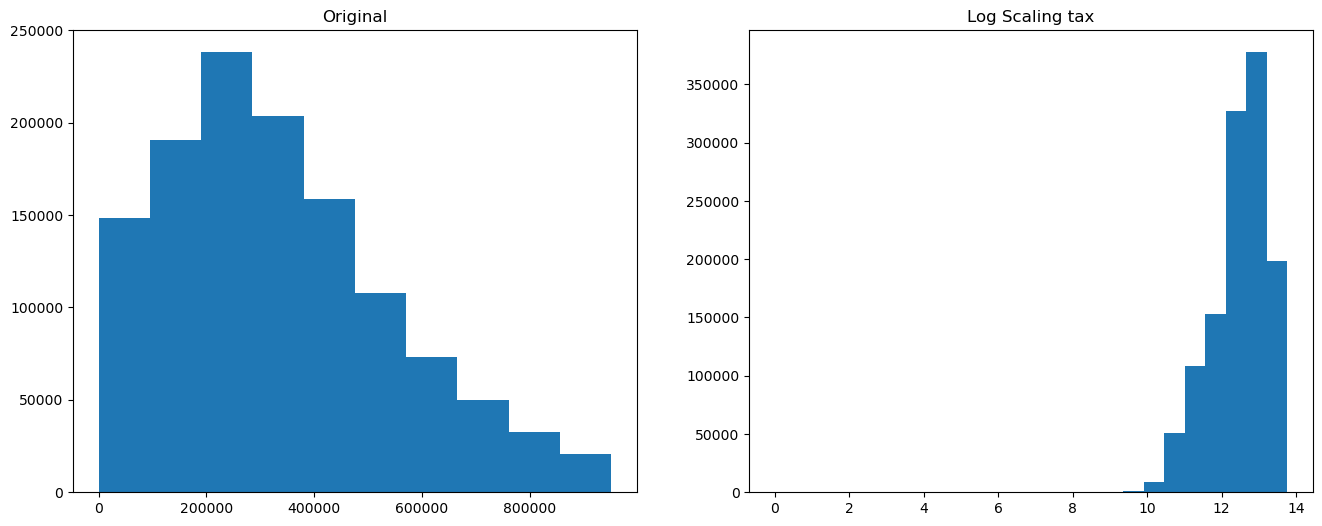

In [12]:
for col in log_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.hist(train_scaled[col])
    ax1.set_title('Original')
    ax2.hist(np.log(train_scaled[col]), bins = 25)
    ax2.set_title(f'Log Scaling {col}')
    plt.show()

Apply the .inverse_transform method to your scaled data

In [13]:
train_scaled[['beds_minmax_inverse',
              'baths_minmax_inverse', 
              'year_minmax_inverse']] = minmax_scaler.inverse_transform(train[normal_cols])
train_scaled[['beds_standard_inverse',
              'baths_standard_inverse', 
              'year_standard_inverse']] = standard_scaler.inverse_transform(train[normal_cols])
train_scaled[['beds_robust_inverse',
              'baths_robust_inverse', 
              'year_robust_inverse']] = robust_scaler.inverse_transform(train[normal_cols])

In [14]:
train_scaled.head().T

,1227506,1506545,450829,947149,75850
beds,3.000000,3.000000,2.000000,4.000000,4.000000
baths,2.000000,2.000000,1.000000,3.000000,3.000000
sq_ft,1993.000000,1512.000000,886.000000,3035.000000,2396.000000
tax,459526.000000,518748.000000,261906.000000,644079.000000,490457.000000
year,1979.000000,1989.000000,1945.000000,2000.000000,1987.000000
fips,6111.000000,6059.000000,6059.000000,6059.000000,6111.000000
county,2.000000,1.000000,1.000000,1.000000,2.000000
2017_age,38.000000,28.000000,72.000000,17.000000,30.000000
beds_minmax,0.333333,0.333333,0.000000,0.666667,0.666667
baths_minmax,0.333333,0.333333,0.000000,0.666667,0.666667


Is the resulting dataset the exact same as the original data?

Looks...weird...

Read the documentation for sklearn's QuantileTransformer. 

Use normal for the output_distribution and apply this scaler to your data.

In [15]:
train_scaled2 = train.copy()

In [16]:
quantile = pre.QuantileTransformer(output_distribution='normal')

In [17]:
train_scaled2[['beds_quantile',
               'baths_quantile', 
               'year_quantile']] = quantile.fit_transform(train[normal_cols])

In [18]:
train_scaled2[['sq_ft_quantile',
               'tax_quantile']] = quantile.fit_transform(train[log_cols])

In [19]:
train_scaled2.head().T

,1227506,1506545,450829,947149,75850
beds,3.000000,3.000000,2.000000,4.000000,4.000000
baths,2.000000,2.000000,1.000000,3.000000,3.000000
sq_ft,1993.000000,1512.000000,886.000000,3035.000000,2396.000000
tax,459526.000000,518748.000000,261906.000000,644079.000000,490457.000000
year,1979.000000,1989.000000,1945.000000,2000.000000,1987.000000
fips,6111.000000,6059.000000,6059.000000,6059.000000,6111.000000
county,2.000000,1.000000,1.000000,1.000000,2.000000
2017_age,38.000000,28.000000,72.000000,17.000000,30.000000
beds_quantile,-0.218773,-0.218773,-5.199338,0.855287,0.855287
baths_quantile,0.005018,0.005018,-5.199338,1.184447,1.184447


Visualize the result of your data scaling

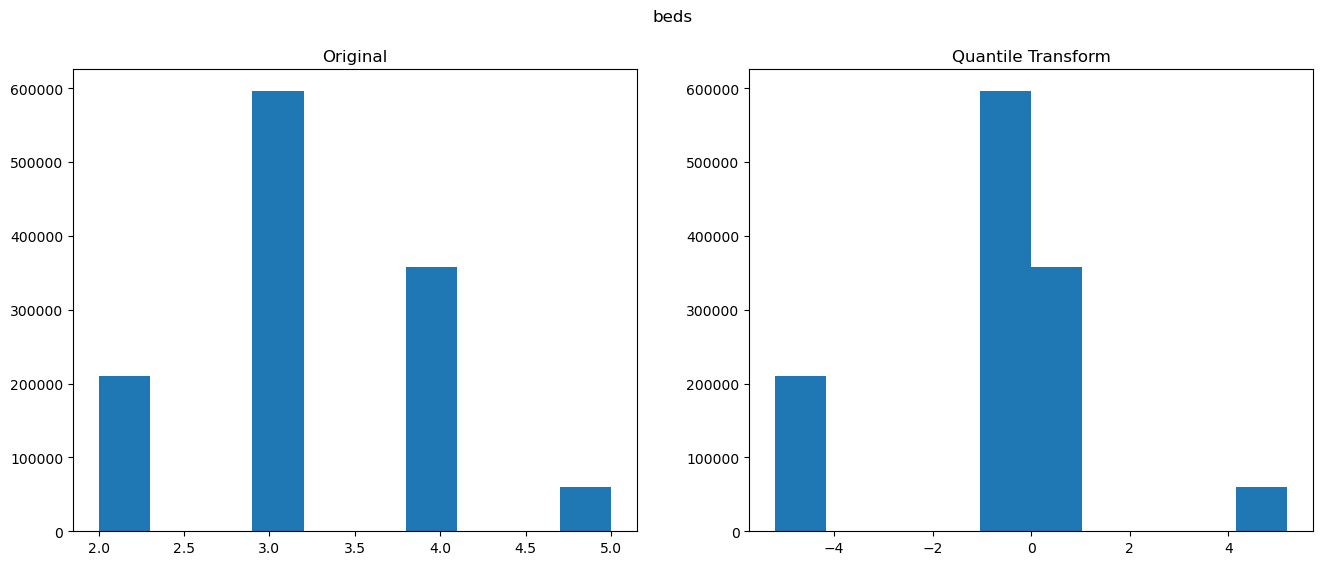

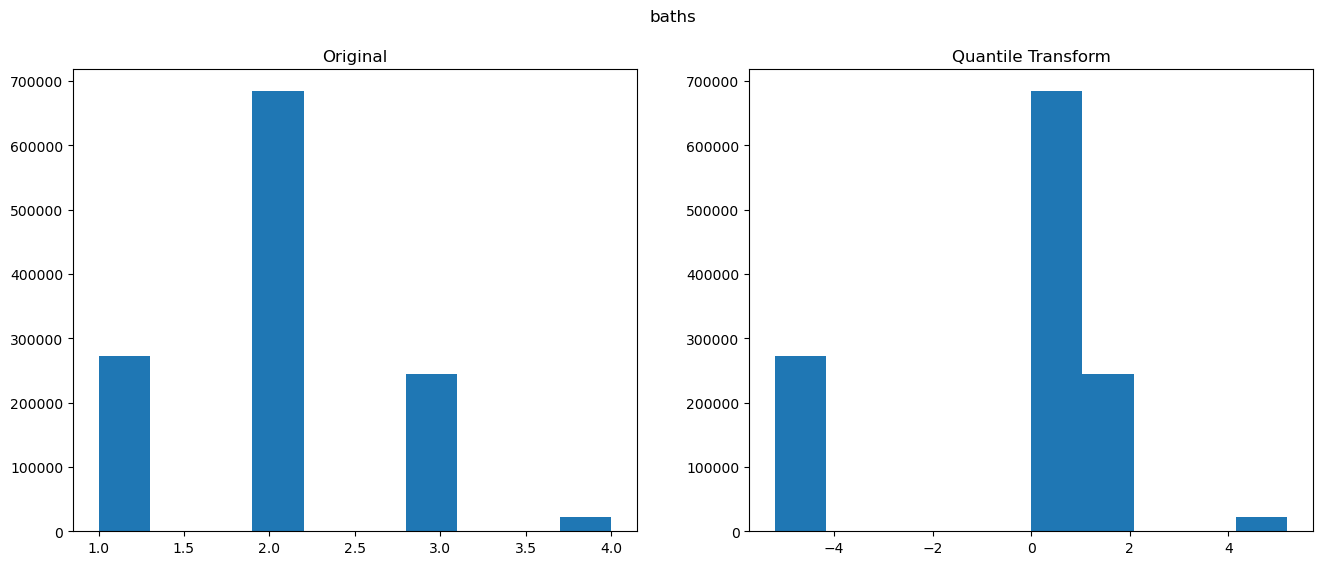

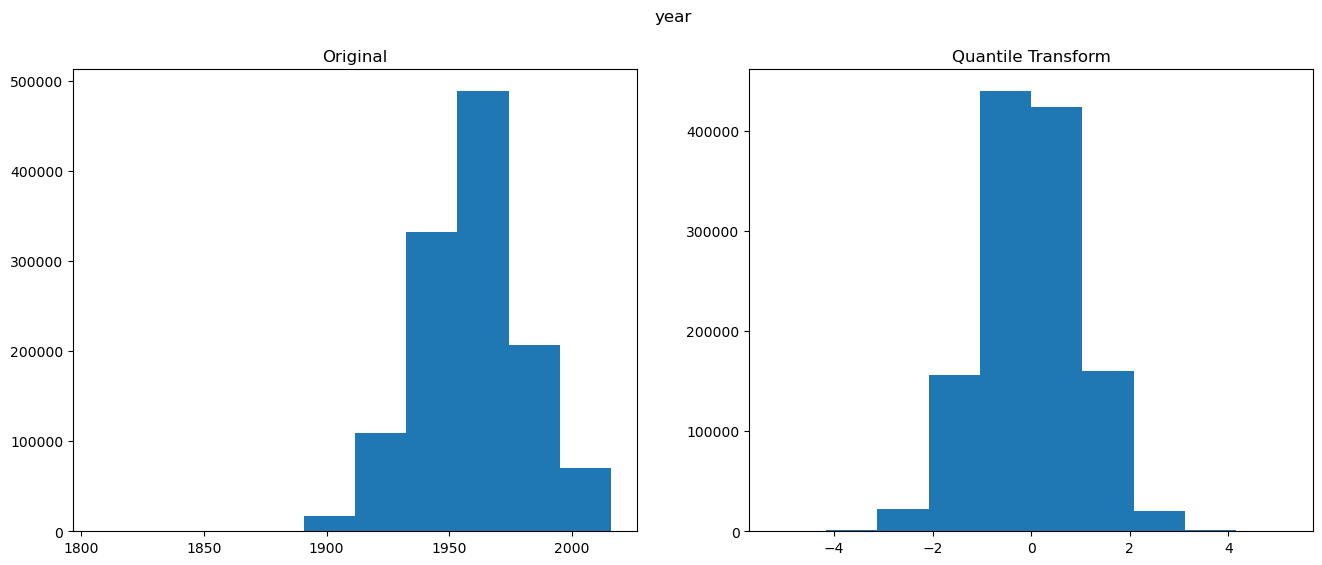

In [20]:
for col in normal_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled2[col])
    ax1.set_title('Original')
    ax2.hist(train_scaled2[f'{col}_quantile'])
    ax2.set_title(f'Quantile Transform')
    plt.show()

Use the QuantileTransformer, but omit the output_distribution argument

In [21]:
quantile1 = pre.QuantileTransformer()

In [22]:
train_scaled2[['sq_ft_quantile1',
               'tax_quantile1']] = quantile1.fit_transform(train[log_cols])

In [23]:
train_scaled2[['beds_quantile1',
               'baths_quantile1', 
               'year_quantile1']] = quantile1.fit_transform(train[normal_cols])

In [24]:
train_scaled2.head().T

,1227506,1506545,450829,947149,75850
beds,3.000000,3.000000,2.000000,4.000000,4.000000
baths,2.000000,2.000000,1.000000,3.000000,3.000000
sq_ft,1993.000000,1512.000000,886.000000,3035.000000,2396.000000
tax,459526.000000,518748.000000,261906.000000,644079.000000,490457.000000
year,1979.000000,1989.000000,1945.000000,2000.000000,1987.000000
fips,6111.000000,6059.000000,6059.000000,6059.000000,6111.000000
county,2.000000,1.000000,1.000000,1.000000,2.000000
2017_age,38.000000,28.000000,72.000000,17.000000,30.000000
beds_quantile,-0.218773,-0.218773,-5.199338,0.855287,0.855287
baths_quantile,0.005018,0.005018,-5.199338,1.184447,1.184447


Visualize your results

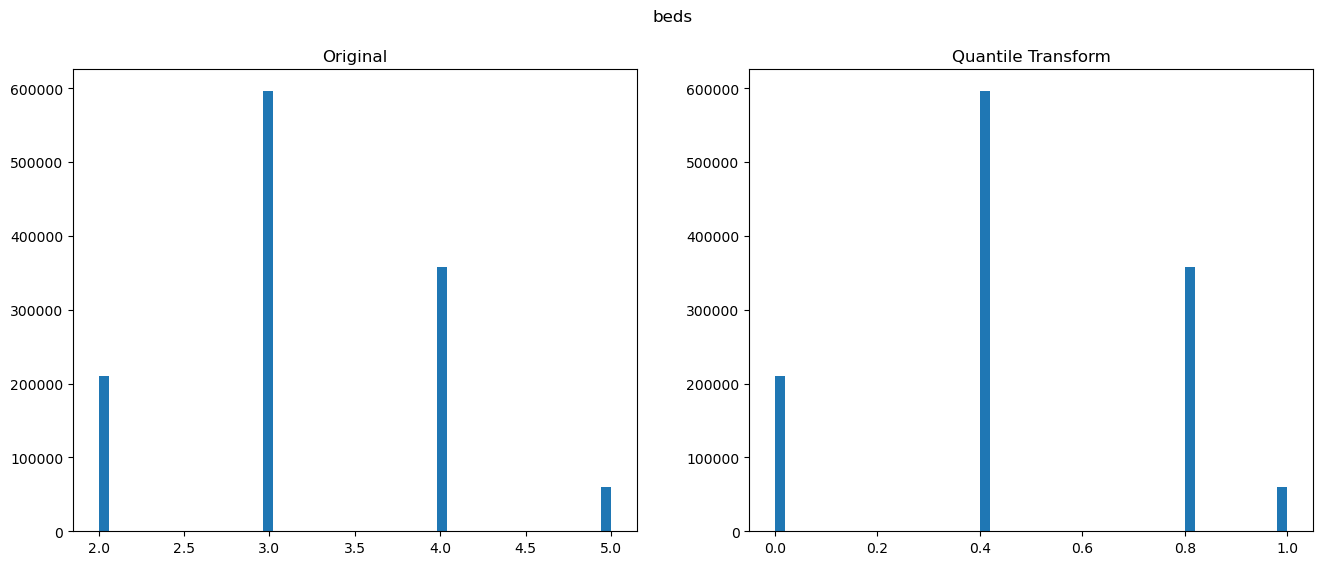

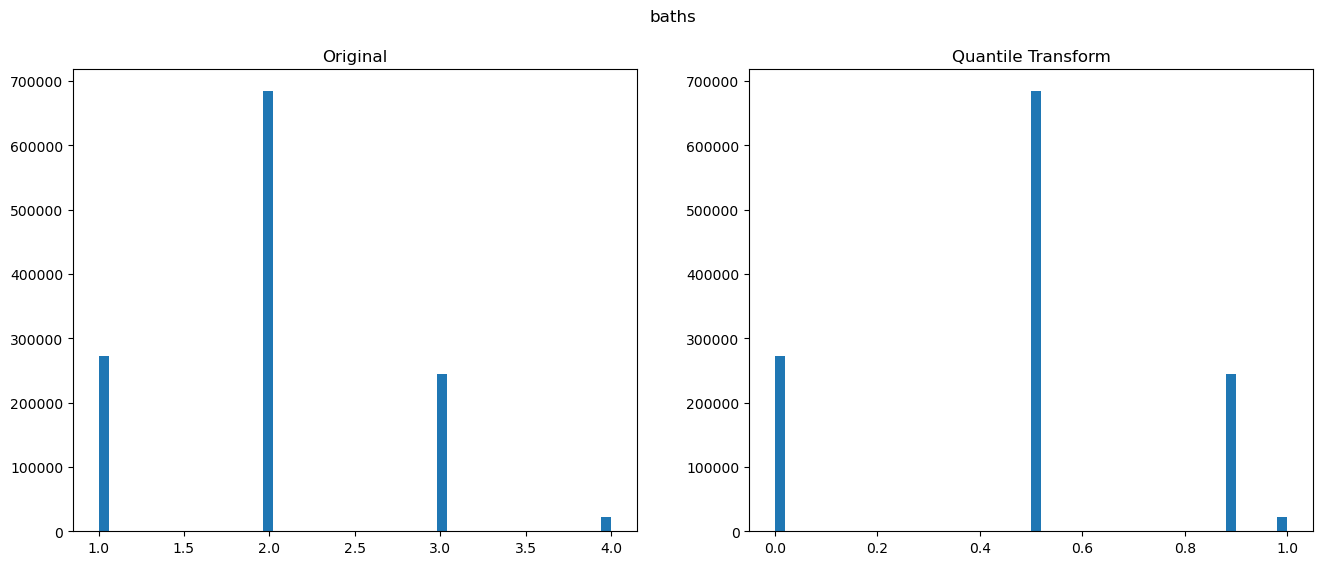

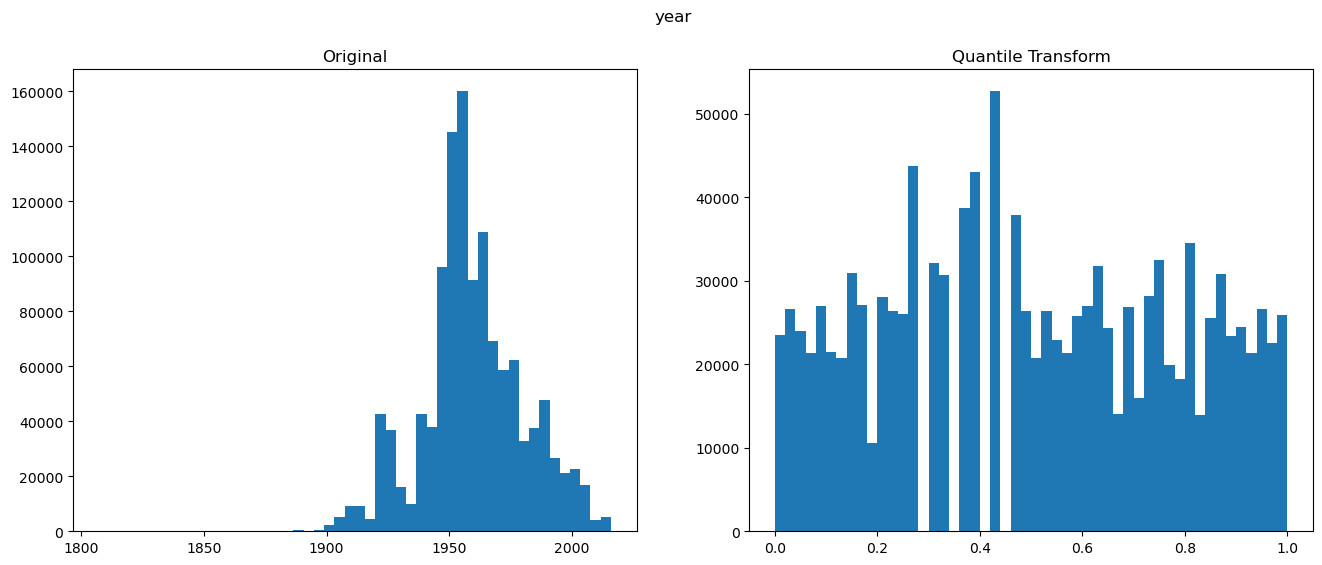

In [25]:
for col in normal_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled2[col], bins=50)
    ax1.set_title('Original')
    ax2.hist(train_scaled2[f'{col}_quantile1'], bins=50)
    ax2.set_title(f'Quantile Transform')
    plt.show()

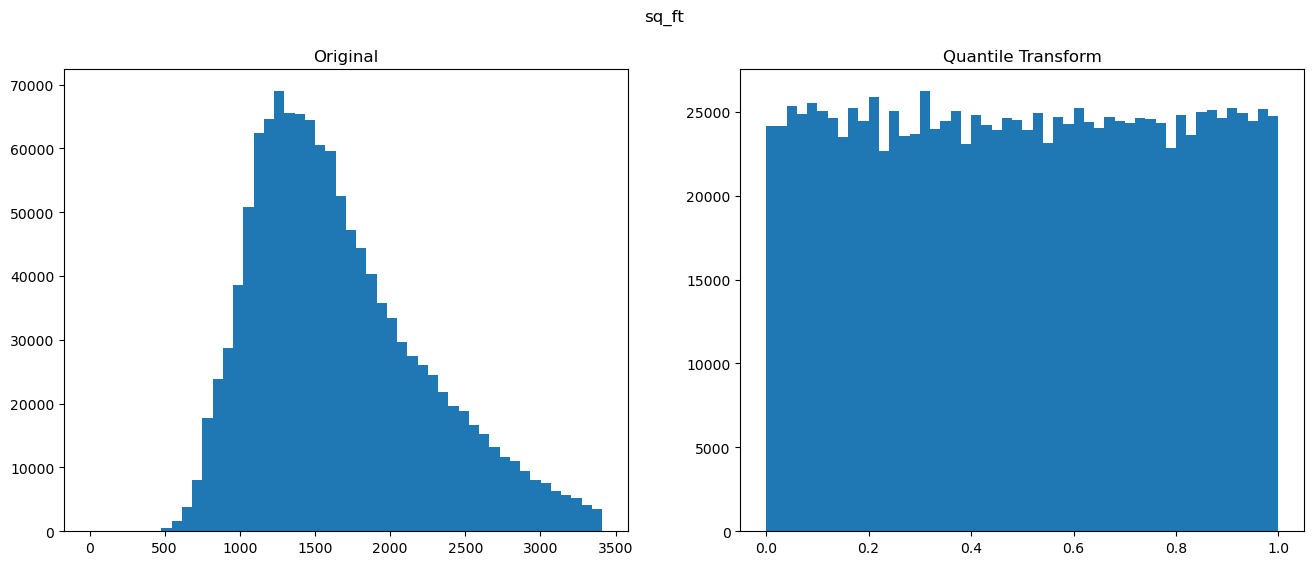

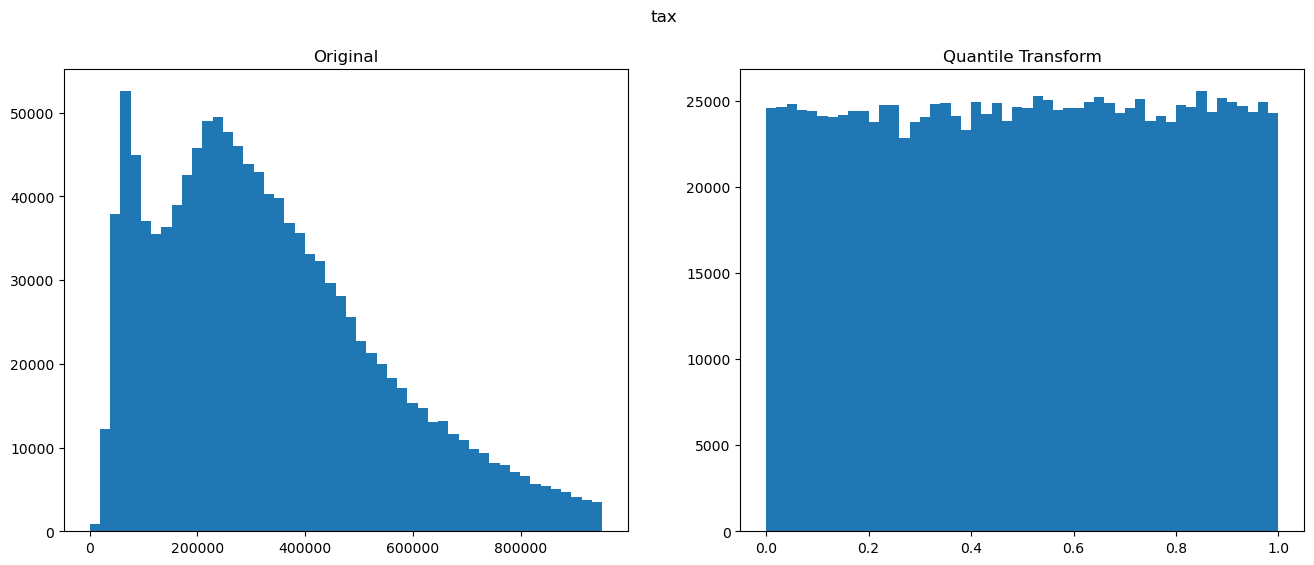

In [26]:
for col in log_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled2[col], bins=50)
    ax1.set_title('Original')
    ax2.hist(train_scaled2[f'{col}_quantile1'], bins=50)
    ax2.set_title(f'Quantile Transform')
    plt.show()

What do you notice?

Based on the work you've done, choose a scaling method for your dataset

In [27]:
def scale_zillow(train, validate, test, scale_features=['beds', 
                                                        'baths', 
                                                        'sq_ft', 
                                                        'tax',
                                                        'year']):
    '''
    Takes in train, validate, test and a list of features to scale
    and scales those features.
    Returns df with new columns with scaled data
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    quantile = pre.QuantileTransformer(output_distribution='normal')
    quantile.fit(train[scale_features])
    
    train_scaled[scale_features] = pd.DataFrame(quantile.transform(train[scale_features]),
                                                  columns=train[scale_features].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[scale_features] = pd.DataFrame(quantile.transform(validate[scale_features]),
                                                  columns=validate[scale_features].columns.values).set_index([validate.index.values])
    
    test_scaled[scale_features] = pd.DataFrame(quantile.transform(test[scale_features]),
                                                 columns=test[scale_features].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [28]:
train_scaled, validate_scaled, test_scaled = scale_zillow(train, validate, test)

In [29]:
train_scaled.head().T

,1227506,1506545,450829,947149,75850
beds,-0.212353,-0.212353,-5.199338,0.858910,0.858910
baths,0.005018,0.005018,-5.199338,1.181921,1.181921
sq_ft,0.658857,-0.074087,-1.700222,1.994971,1.148123
tax,0.678326,0.893683,-0.184087,1.307636,0.794531
year,0.957454,1.318946,-0.910873,1.792374,1.212751
fips,6111.000000,6059.000000,6059.000000,6059.000000,6111.000000
county,2.000000,1.000000,1.000000,1.000000,2.000000
2017_age,38.000000,28.000000,72.000000,17.000000,30.000000


In [30]:
train_scaled, validate_scaled, test_scaled = w.scale_zillow(train, validate, test)

In [31]:
train_scaled.head().T

,1227506,1506545,450829,947149,75850
beds,-0.209787,-0.209787,-5.199338,0.860725,0.860725
baths,0.010037,0.010037,-5.199338,1.186981,1.186981
sq_ft,0.666374,-0.076604,-1.689670,2.005571,1.155631
tax,0.667161,0.883132,-0.184125,1.298520,0.780940
year,1979.000000,1989.000000,1945.000000,2000.000000,1987.000000
fips,6111.000000,6059.000000,6059.000000,6059.000000,6111.000000
county,2.000000,1.000000,1.000000,1.000000,2.000000
2017_age,38.000000,28.000000,72.000000,17.000000,30.000000
